In [66]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
import matplotlib.pyplot as plt
import time
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error as MSE
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score  # 交叉检验
from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import RandomForestClassifier

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import scipy
from PIL import Image
from numpy import *
import cv2
import torch.nn as nn
import torch
#from model import ResNet, BasicBlock, Bottleneck, resnet34
import torch.optim as optim
import torchvision.models as models
from torch.utils.data import DataLoader

from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_selection import SelectFromModel

from matplotlib.font_manager import FontProperties  

from pylab import *

['黄色' '蓝色' '绿色' '红色' '紫色' '棕色' '粉色' '黑色' '白色' '其他']


C:\Users\55019\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\55019\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


accuracy: 0.48148148148148145
簇心=[[11.375      15.5        15.75        5.625       8.125       7.875
   1.625       5.3125      5.8125     23.0625    ]
 [ 6.27272727 14.09090909  9.18181818  8.54545455  8.72727273 12.81818182
   8.36363636  4.54545455 15.45454545 12.        ]]
测试结果：[1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0]
CH分数=5.559306070791478
轮廓系数=0.14027553751722494
[2 5 0 9 1 4 3 8 6 7]
[0.10738503 0.09419653 0.20286786 0.06713019 0.07392854 0.18546766
 0.05824443 0.04791519 0.06413226 0.0987323 ]


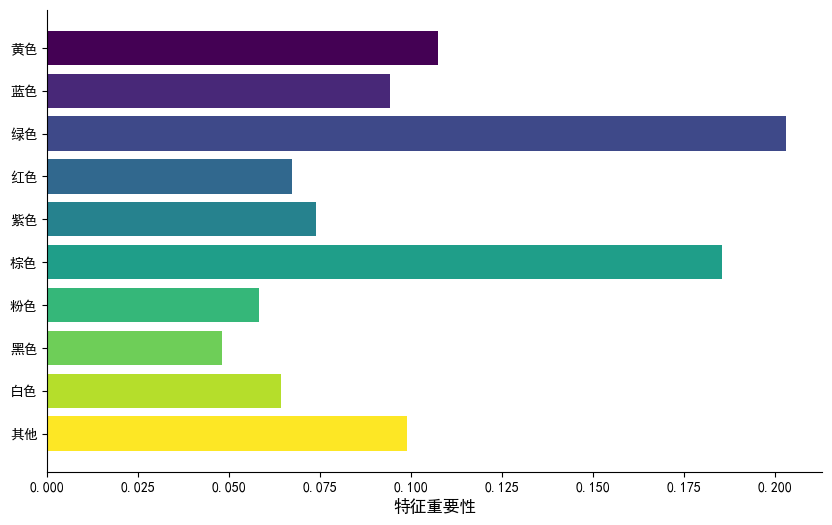

In [100]:
fd=np.array(pd.read_csv('C:\\Users\\55019\\Desktop\\result2\\result_resnet152_feature2.csv'))
score={}
for i in fd:
    score[i[1]]=i[3]

fd=np.array(pd.read_csv('D:\\zsy\\zsy颜色统计.csv',header=None))
features=fd[0,1:11]
print(features)
x_train=[]
y_train=[]
for i in fd[1:]:
    x_train.append(list(i[1:11].astype(int)))
    y_train.append(score[str(int(i[0]))+'.png'])
    #figures[str(int(i[0]))+'.png']=list(i[1:11].astype(int))+[score[str(int(i[0]))+'.png']]
#print(figures)

kmeans=KMeans(n_clusters=2)
y=kmeans.fit(x_train)
y=kmeans.predict(x_train)

score=0
for i in range(len(y)):
    if y_train[i]==y[i]:
        score+=1
print('accuracy:',score/len(y))
print("簇心={}".format(kmeans.cluster_centers_))  #打印簇心
print("测试结果：{}".format(y))  #预测样本
print("CH分数={}".format(metrics.calinski_harabasz_score(x_train, kmeans.labels_))) 
print("轮廓系数={}".format(metrics.silhouette_score(x_train,kmeans.labels_,metric='euclidean'))) 

forest = RandomForestClassifier(random_state=0)
forest.fit(x_train, y_train)
importances=forest.feature_importances_
index=np.argsort(importances)[::-1]
print(index)
print(importances)


mpl.rcParams['font.sans-serif'] = ['SimHei']
colors = plt.cm.viridis(np.linspace(0, 1, len(features)))
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(features, importances, color=colors)
ax.invert_yaxis()  # 翻转y轴，使得最大的特征在最上面
ax.set_xlabel('特征重要性', fontsize=12)  # 图形的x标签
    
ax.spines['top'].set_visible(False)  # 去掉上边框
ax.spines['right'].set_visible(False)  # 去掉右边框
 
# 保存图形
#plt.savefig('D:\\zsy\\特征重要性.png', dpi=600, bbox_inches='tight')
plt.show()


In [101]:
feature=[features[2],features[5],features[1],features[8]]
data=[]
for i in x_train:
    data.append([i[2],i[5],i[1],i[8]])
data=np.array(data)

kmeans=KMeans(n_clusters=2)
y=kmeans.fit(data)
y=kmeans.predict(data)
print(y_train)
score=0
for i in range(len(y)):
    if y_train[i]==y[i]:
        score+=1
print('accuracy:',score/len(y))
print("簇心={}".format(kmeans.cluster_centers_))  #打印簇心
print("测试结果：{}".format(y))  #预测样本
print("CH分数={}".format(metrics.calinski_harabasz_score(data, kmeans.labels_))) 
print("轮廓系数={}".format(metrics.silhouette_score(data,kmeans.labels_,metric='euclidean'))) 

C:\Users\55019\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\55019\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
accuracy: 0.7037037037037037
簇心=[[ 9.7        12.2        13.6        12.35      ]
 [22.71428571  3.28571429 18.71428571  2.28571429]]
测试结果：[0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1]
CH分数=12.060257749912923
轮廓系数=0.2851972247252317
